In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
os.chdir('../../')

In [3]:
from musicautobot.numpy_encode import *
from musicautobot.config import *
from musicautobot.music_transformer import *

## MusicTransformer Training

MusicTransformer takes the basic idea of [Language Models](https://en.wikipedia.org/wiki/Language_model) and applies it to Music.  

Given a sequence of notes, predict the next most likely set of notes.

This model is based off of [transformer-XL](https://arxiv.org/abs/1901.02860) and uses fast.ai's [implementation](https://github.com/fastai/fastai/blob/master/fastai/text/models/transformer.py) of it.

In [4]:
# Location of your midi filesfiles
midi_path = Path('data/midi/examples')
midi_path.mkdir(parents=True, exist_ok=True)

# Location to save dataset
data_path = Path('data/numpy')
data_path.mkdir(parents=True, exist_ok=True)

data_save_name = 'musicitem_data_save.pkl'

## 1. Gather midi dataset

Make sure all your midi data is in `musicautobot/data/midi` directory

Here's a pretty good dataset with lots of midi data:  
https://www.reddit.com/r/datasets/comments/3akhxy/the_largest_midi_collection_on_the_internet/

Download the folder and unzip it to `data/midi`

## 2. Create dataset from MIDI files

In [5]:
midi_files = get_files(midi_path, '.mid', recurse=True); len(midi_files)

19

In [6]:
processors = [Midi2ItemProcessor()]
data = MusicDataBunch.from_files(midi_files, data_path, processors=processors, bs=2, bptt=12)
data.save(data_save_name)

In [7]:
# Show Data
data.train_dl.on_epoch_begin()
x, y = data.one_batch();
x, y

(tensor([[  0,   1,  76, 138,  64, 140,  59, 140,  57, 140,   8, 138],
         [139,  75, 139,   8, 139,  73, 141,   8, 141,  70, 138,   8]]),
 tensor([[  1,  76, 138,  64, 140,  59, 140,  57, 140,   8, 138,  76],
         [ 75, 139,   8, 139,  73, 141,   8, 141,  70, 138,   8, 138]]))

## 3. Load Model

In [8]:
batch_size = 1
data = load_data(data_path, data_save_name, bs=batch_size)

In [9]:
config = default_config()
learn = music_model_learner(data, config=config.copy())

## 4. Train

In [10]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,3.281120,2.193392,0.520408,00:09
1,2.705862,2.830750,0.195918,00:09
2,2.617921,1.954006,0.520408,00:08
3,2.500920,2.104601,0.520408,00:09


In [ ]:
learn.save('example')

## 5. Predict

---
See [Generate.ipynb](Generate.ipynb) to use a pretrained model and generate better predictions

---

In [11]:
midi_file = Path('data/midi/notebook_examples/single_bar_example.mid'); midi_file
item = MusicItem.from_file(midi_file, data.vocab);

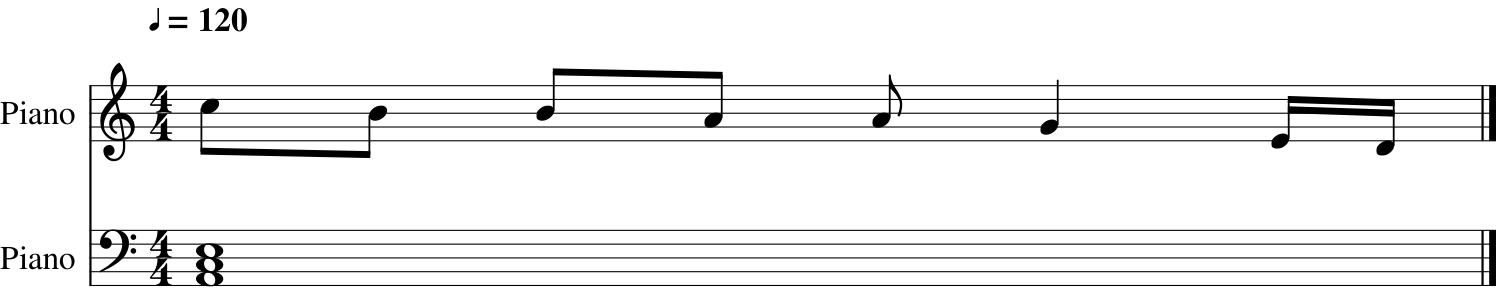

In [12]:
item.show()

Here's what the seed sounds like:

### Start Predictions:

In [16]:
pred, full = learn.predict(item, n_words=100)

Prediction

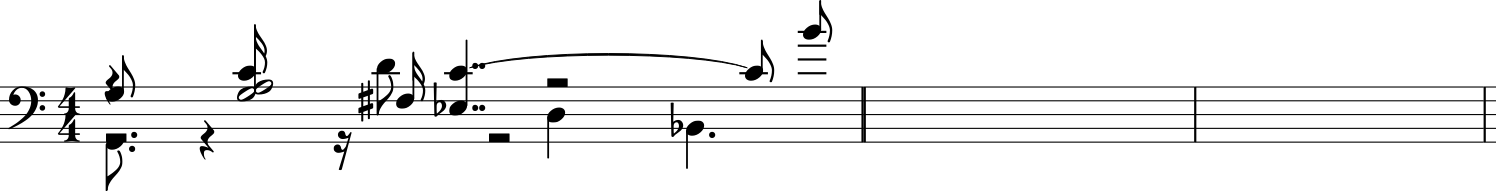

In [17]:
# Prediction
pred.show()

In [ ]:
pred.play()